<br />

<div style="text-align: center;">
<font size="7">教師あり学習 : 分類 p.206~</font>
</div>
<br />
<div style="text-align: right;">
<br />
<font size="4">cc by Ryota Sakaguchi 2020 </font>
</div>

6 章では、 __分類問題__を扱う。

5 章では目標データが連続した数値だったが、
6 章の分類問題では、 __目標データがクラス__になる。
- 例: {0: 果物, 1: 野菜}

- 割り振られている整数の順番には意味がない

分類問題では、 __確率を出力する関数__ を考える。

- 確率の概念を導入することによって、予測の「不確かさ」も定量的に扱うことができるようになる

> 分類 (統計学) - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E5%88%86%E9%A1%9E_(%E7%B5%B1%E8%A8%88%E5%AD%A6)
> 
> Statistical classification - Wikipedia
> 
> https://en.wikipedia.org/wiki/Statistical_classification
> 
> \# 流し見程度に

# 6.1 ||| 1 次元入力 2 クラス分類

## 6.1.1 問題設定 (p.206~)

まず、体重データ $X$ から性別 $T$ を予測するモデルを作るため、
人工データを生成する。

In [1]:
# リスト 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成 --------------------------------
np.random.seed(seed=0) # 乱数を固定
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']          
X = np.zeros(X_n) # 入力データ
T = np.zeros(X_n, dtype=np.uint8) # 目標データ
Dist_s = [0.4, 0.8] # 分布の開始地点
Dist_w = [0.8, 1.6] # 分布の幅
Pi = 0.5  # クラス 0 の比率
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# データ表示 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


メスになる確率を $Pi$ として、0 or 1 のクラスを確率的にラベル付けする。

メス、オスの体重から性別を予測するモデルを作りたいので、
メス、オスそれぞれの体重を異なる幅の一様分布からサンプルする。

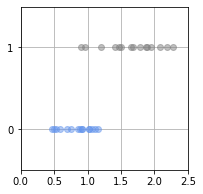

In [2]:
# リスト 6-1-(2)
# データ分布表示 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o') # (B)
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])
    
# メイン ------------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()


> 2 次元および 3 次元プロット - MATLAB & Simulink - MathWorks 日本
>
> https://jp.mathworks.com/help/matlab/2-and-3d-plots.html
> 
> メモ

異なる幅の一様分布からサンプルできていることが確認できる。モデルは作れたので、この後はどうやって予測するか考える。

方針は、オス、メスを分ける境界線を決めること。この境界線のことを __決定境界__ と呼ぶ。

> Decision boundary - Wikipedia
>
> https://en.wikipedia.org/wiki/Decision_boundary
>
> \# 日本語の wiki はなかったけど、あんまり大したことは書いてなさそう

上図の場合、体重が 1.2g ぐらいのところに決定境界を引けばよさそうなことがわかる。

5 章の線形回帰モデルを使えばいいと思うかもしれないが、そう上手くはいかない。

なぜなら、質量が十分に大きいデータ点で、直線がデータ点に重なっていないので誤差が発生するから。

- 誤差を解消しようとすると、決定境界がオス側に引っぱられる(P.210、図 6.3)。

## 6.1.2 確率で表すクラス分類 (p.210~)

上の出力した人工データの分布から、体重が 0.8g より小さいとメスで、1.2g より大きいとオスであると言える。

しかし、0.8 < 体重 < 1.2 のときはオスかメスか断定できない。

そこで、 __確率が登場__ する。

オスである確率を考えると、その確率は体重 $x$ によって以下にように変化する。
- $x \le 0.8$ のとき: オスである確率 0
- $0.8 \le x \le 1.2$ のとき: オスである確率 1/3
- $1.2 \le x$ のとき: オスである確率 1

上記のような $x$ に対する $t = 1$ (オス)である確率は条件付き確率を使って以下にように表される。

$$ P(t = 1|x) $$

条件付き確率は $x$ の関数であると見なすことができ、プロットすると __階段のようなグラフ__ になる(p.211 図6.4)。

- 条件付き確率のグラフははっきりと予測できない __不確実な領域も確率的な予測ができる__

- __不確実性を明確に表せているという点で__ いうと、 __直線によるフィッティングよりも優れている__

結局、決定境界はどこに引けばよいの? というとオス・メスである確率が等しくなるところが決定境界となる。

→ つまり、$P(t=1|x)=0.5$ となる $x$ が決定境界となる

ここまでは、人工データを扱っていたので、真の分布がわかっている前提だったが、本来はそうでない。

実際には、 __サンプルしたデータから真の分布を推定する必要がある__。

## 6.1.3 最尤推定 (p.212~)

さっきの例では、真の分布がわかっていたのでオスである確率を見積れたが、実際にはサンプルしたデータから推定しなければならない。

そこで、 __最尤推定__ という方法を用いる。

> 最尤推定 - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E6%9C%80%E5%B0%A4%E6%8E%A8%E5%AE%9A
> 
> \# wikipedia の説明わかりづらい...

最尤推定の考え方をまとめると、

- 与えられた入力データ $x$ に対して、 __ラベルデータ $T$ が生成される確率(尤度) が一番大きくなる $w$ を推定する__ ことである。

→ すなわち、 $P(t=1|x)=w$ が最大となる $w$ を求めればよい。

最大値となる $w$ を求めるには、対数をとって、微分するという流れ。

教科書 p.212 では、T = 0, 0, 0, 1 がモデルから生成された確率を例に取り上げている。

しかし、 __まだ実践的ではない__。

なぜなら、確率が一定であるという前提のもとでパラメータの推定を行っていたから。

実際には、確率が一定となる区間はわからないし、確率が一定となる区間なんて存在しないかもしれない。

- あるときは、0 が生成されやすいかもしれないし、またべつのときは 1 が生成されやすいかもしれない。

## 6.1.4 ロジスティック回帰モデル (p.215~)

ここまでは、データを一様分布から生成されたものとして考えてきた。

しかし、実際にデータが一様分布となることはない。

ここからは、生成されるデータがガウス分布に従っていると仮定して進んでいく。

- 体重や身長のばらつきは、ガウス分布でよく近似できることがわかっている

> 正規分布 - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83
> 
> \# 正規分布という呼び方のほうが馴染み深いかも。

\# 正規分布に従わないときどうする? 正規分布で多くの場合いけるらしい

ガウス分布に従ってデータが生成されるという仮定のもとでは、

条件付き確率 $P(t=1|x)$ は、 __ロジスティック回帰モデル__ で表されるらしい。

> ロジスティック回帰 - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0
> 
> \# 0, 1 を扱うものだからロジスティック回帰モデルが使える?
>
> \# ロジットを使うからロジスティックらしい
> 
> ロジット - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%83%83%E3%83%88
>
> \# 日本語版ちょっとあやしげ
>
> Logit - Wikipedia
>
> https://en.wikipedia.org/wiki/Logit
> 
> \# 結局 logit がなにかはよくわからなかった

ロジスティック回帰モデルは、直線の式 $y = w_0 x + w_1$ をシグモイド関数 $\sigma(x)=\frac{1}{1+exp(-x)}$ の中に入れた形になる。

$$ y = \sigma(w_0 x + w_1) = \frac{1}{1 + exp\{-(w_0 x + w_1)\}}$$

ロジスティック回帰モデルのプログラムは以下である。

In [3]:
# リスト 6-1-(3)
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

1.25

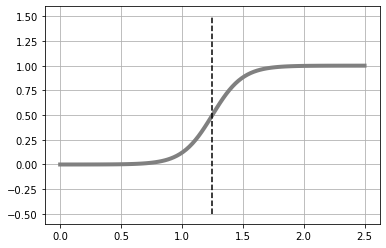

In [4]:
# リスト 6-1-(4)
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 決定境界
    i = np.min(np.where(y > 0.5))  # (A)
    B = (xb[i - 1] + xb[i]) / 2    # (B)
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B

# test1
W = [8, -10]
show_logistic(W)

1.25

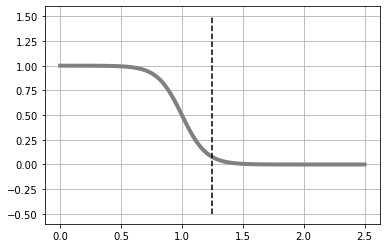

In [5]:
# test2
# w0, w1 を変えてみる
W = [-10, 10]
show_logistic(W)

直線 $y = w_0 x + w_1$ が 0 と 1 の範囲につぶされていることがわかる。

## 6.1.5 交差エントロピー誤差 (p.218~)

6.1.3 の最尤推定と考え方は同じで、一般化を考える。

クラスの生成確率を以下で表す。

$$P(t|x)=y^t(1-y)^{(1-t)}$$

6.1.3 の例における

$$P(T=0,0,0,1|x) = (1-w)^3 w$$

の $w$ が $y$ になって、クラスデータの生成総回数が $t$ になっただけ。

6.1.3 の流れと基本的には同じ。

注意すべきは、平均二乗和誤差と合わせるために、-1 を掛けあわせて、誤差を最小になるようなパラメータを求めるとなっていること。

クラスの生成確率を対数とって、-1 を掛けあわせたものを __交差エントロピー誤差__ と呼ぶ。具体的には以下の式で表される。

$$-logP(T|X)=-\sum_{n=0}^{N-1} \{t_n logy_n + (1-t_n)log(1-y_n)\}$$

\# $-log$ だからエントロピー? 交差ってどういうこと?

> 交差エントロピー - Wikipedia
>
> https://ja.wikipedia.org/wiki/%E4%BA%A4%E5%B7%AE%E3%82%A8%E3%83%B3%E3%83%88%E3%83%AD%E3%83%94%E3%83%BC
>
> Cross entropy - Wikipedia
> 
> https://en.wikipedia.org/wiki/Cross_entropy
> 
> \# 情報理論から派生したものっぽい、エントロピーとついてるのも理解できる
> 
> \# between two probability distributions だから cross なんかな?

交差エントロピー誤差をデータのサイズ $N$ で割った、 __平均交差エントロピー誤差__を $E(w)$ と定義する。

In [6]:
# リスト 6-1-(5)
# 平均交差エントロピー誤差 ---------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

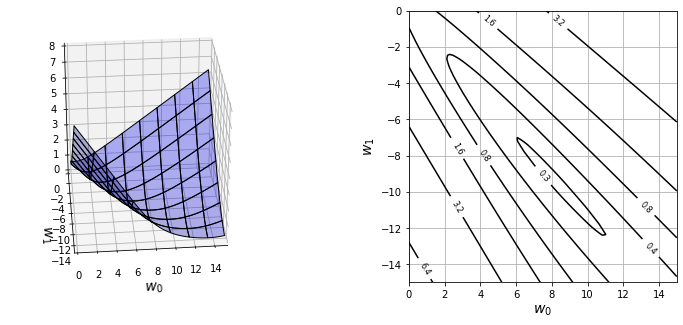

In [7]:
# リスト 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 計算 --------------------------------------
wn = 80  # 等高線表示の解像度
w_range = np.array([[0, 15], [-15, 0]])
w0 = np.linspace(w_range[0, 0], w_range[0, 1], wn)
w1 = np.linspace(w_range[1, 0], w_range[1, 1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))             
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w, X, T)
        
# 表示 --------------------------------------
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

↑ を実行すると以下のエラーが出た。

> -------------------------------------------------------------------
> 
> ImportError                       Traceback (most recent call last)
> 
> <ipython-input-33-105c88de906b> in <module>()
>
>      1 # リスト 6-1-(6)
>       
> ----> 2 from mpl_toolkits.mplot3d import Axes3D
> 
>      3 
>      
>      4 # 計算 --------------------------------------
>      
>     5 wn = 80  # 等高線表示の解像度
>
> ImportError: No module named mpl_toolkits.mplot3d

pip でインストールしようとするが

> ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
> 
> ERROR: No matching distribution found for mpl_toolkits
    
mpl_toolkits は、PyPI にはないらしい。

`# apt install python-matplotlib`

でいけた。

MatplotlibDeprecationWarning はよくわからないが、プロットできたのでとりあえずはよしとする。

グラフから $w_0 = 9$、$w_1 = -9$ らへんに最小値がありそうなことがわかる。

## 6.1.6 学習則の導出 (p.222~)

交差エントロピー誤差が最小となるパラメータの解析解は求めることができない。

なぜなら、$y_n$ が非線形のシグモイド関数を含んでいるから。

なので、勾配法(p.152 5.1.3 参照) を使って数値的に求める。

4 章見返すのとこれまでの知識を使って、紙に書きながら偏微分していけば、このあたりの流れは追える。

実際に $w_0$, $w_1$ で偏微分したものをプログラムに書きおこすと以下になる。

In [8]:
# リスト 6-1-(7)
# 平均交差エントロピー誤差 の微分 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

## 6.1.7 勾配法による解 (p.226~)

平均交差エントロピー誤差が最小となるようなパラメータを求めたいので、scipy の minimize() 関数で勾配法を試みる。

今回用いる minimize() では、共役勾配法という勾配法を用いる。あとは w の初期値とかもろもろが引数として必要。

> 共役勾配法 - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E5%85%B1%E5%BD%B9%E5%8B%BE%E9%85%8D%E6%B3%95
> 
> \# 大規模な疎行列を解くために利用されるらしい、あと学習率(p.153 参照)を指定する必要がない

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


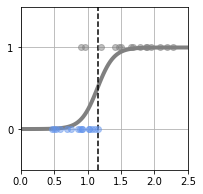

In [9]:
# リスト 6-1-(8)
from scipy.optimize import minimize

# パラメータサーチ
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), 
                      jac=dcee_logistic, method="CG")     # (A)
    return res1.x

# メイン ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

決定境界は、1.15 g となった。
予想とおおよそあっていることが確認できる。

# 6.2 ||| 2 次元入力 2 クラス分類

## 6.2.1 問題設定 (p.228~)

データをリセットして、6.1.1 と同様に人工データを生成する。

人工データの生成方法は、6.1.1 とおおよそ同じ。

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
# リスト 6-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成 --------------------------------
np.random.seed(seed=1)  # 乱数を固定
N = 100  # データの数
K = 3  # 分布の数
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]  # X0 の範囲 , 表示用
X_range1 = [-3, 3]  # X1 の範囲 , 表示用
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 分布の分散
Pi = np.array([0.4, 0.8, 1])  # (A) 各分布への割合 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2] 

データ数 $N=100$、入力データ $X$ は、$N$ x $2$、2 クラス分類データ $T2$ は $N$ x $2$、 3 クラス分類データ $T3$ は、$N$ x $3$

In [12]:
print(X[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [13]:
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


[0 1] がクラス 1 で、[1 0] がクラス 0

In [14]:
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


[0 1 0] がクラス 1 で、[1 0 0] がクラス 0

T2 および T3 を図示すると ↓

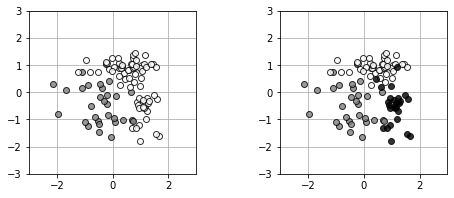

In [66]:
# リスト 6-2-(5)
# データ表示 --------------------------
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                  linestyle='none', markeredgecolor='black',
                  marker='o', color=c[k], alpha=0.8)
    plt.grid(True)
    
# メイン ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

この後の流れも 6.1 と大体おなじ。

## 6.2.2 ロジスティック回帰モデル (p.232~)

1 次元入力バージョン $y=\sigma(w_0 x + w_1) = P(t=1|x)$ から以下のように容易に 2 次元入力バージョンに拡張できる。

$$y = \sigma(w_0 x_0 + w_1 x_1 + w_2)$$

\# なんで ↑ の式に拡張できるのかはよくわかってないが、いったん受け入れる

In [16]:
# リスト 6-2-(6)
# ロジスティック回帰モデル -----------------
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

2 次元ロジスティック回帰モデルと人工データを 3D プロットする。
W = [-1, -1, -1] はてきとう。

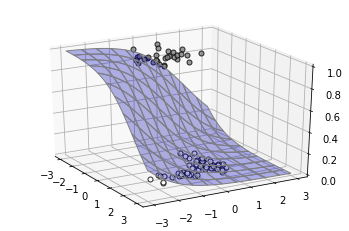

In [17]:
# リスト 6-2-(7)
# モデル 3D 表示 ------------------------------
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)
    
def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    ax.view_init(elev=25, azim=-30)

# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)
plt.show()

等高線を 2D 表示すると以下のようになる。

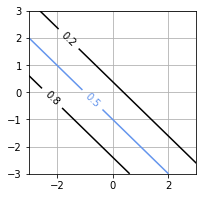

In [18]:
# リスト 6-2-(8)
# モデル等高線 2D 表示 ------------------------
def show_contour_logistic2(w):
    xn = 30  # パラメータの分割数
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    # print(xx0, xx1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%.1f', fontsize=10)
    plt.grid(True)

# test ---
plt.figure(figsize=(3,3))
W=[-1, -1, -1]
show_contour_logistic2(W)
plt.show()

横軸 -3 から 3 で縦軸 3 から -3 になってる方が 3D プロットのグラフとそろってて見やすいが、どうするかわからなかったので断念。


2 クラス分類なので、6.1 で出てきた平均交差エントロピー誤差関数がそのまま使える。

In [19]:
# リスト 6-2-(9)
# 交差エントロピー誤差 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

偏微分も同様に。

In [20]:
# リスト 6-2-(10)
# 交差エントロピー誤差 の微分 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee

# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

このあとも前節と同様に、勾配法(minimize())を用いて平均交差エントロピー誤差を最小とするパラメータを求める。

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


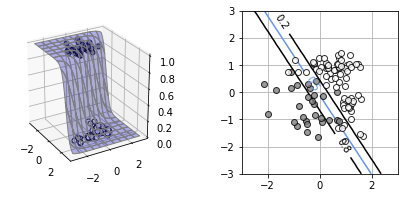

In [21]:
# リスト 6-2-(11)
from scipy.optimize import minimize

# ロジスティック回帰モデルのパラメータサーチ --
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x

# メイン ------------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

うまく決定境界が引けていることが確認できる。

2 次元入力バージョンのロジスティック回帰モデルでは、

シグモイド関数によって面が 0 と 1 の間につぶされたことになるので、決定境界は直線になる。

## 実際のデータセットを用いた 2 次元入力 2 クラス分類 (おまけ)

ここで、実際のデータセットを用いて、2 次元入力 2 クラス分類をやってみる。

データセットは、以下の URL からダウンロードしたものを用いた。

https://www.kaggle.com/bulentsiyah/classification

比較的分類しやすそうなデータセットを選んだ。

6.2 と同様の流れでやってみる。

In [50]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [51]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# データ読み込み  --------------------------------
data = pd.read_csv("./data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

# 読み込んだデータを教科書の入力に合わせる  --------------------------------
N = len(data.diagnosis)  # データの数
K = 2 # 分布の数
T2 = np.zeros((N, 2), dtype=np.uint8)
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
# X0 の範囲 , 表示用
X_range0 = [min(data.radius_mean), max(data.radius_mean)]
# X1 の範囲 , 表示用
X_range1 = [min(data.texture_mean), max(data.texture_mean)]

for n in range(N):
    for k in range(K):
        if k == 0:
            X[n, k] = data.radius_mean[n]
            if data.diagnosis[n] == 'M':
                T2[n, k] = 1
        else:
            X[n, k] = data.texture_mean[n]
            if data.diagnosis[n] == 'B':
                T2[n, k] = 1
           
print(X[:10,:])
print(T2[:20,:])

[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 [11.42 20.38]
 [20.29 14.34]
 [12.45 15.7 ]
 [18.25 19.98]
 [13.71 20.83]
 [13.   21.82]
 [12.46 24.04]]
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


csv から入力データを読み込めていることを確認。
クラスも分けられてる。

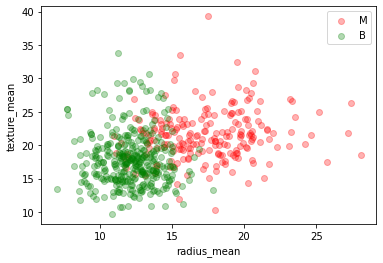

In [52]:
# scatter を使ってみた --------------------------
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="M",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="B",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()

# print(len(data.radius_mean), min(data.radius_mean), max(data.radius_mean))

plt.show()
# png ファイルにも吐き出せる
# plt.savefig('figure01.png')

scatter で散布図をプロットしてみた。
おしゃれ。

> 散布図 - MATLAB scatter - MathWorks 日本
>
> https://jp.mathworks.com/help/matlab/ref/scatter.html

このあとも同様に。

In [53]:
# リスト 6-2-(6)
# ロジスティック回帰モデル -----------------
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

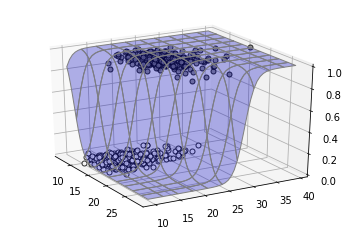

In [54]:
# リスト 6-2-(7)
# モデル 3D 表示 ------------------------------
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)
    
def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    ax.view_init(elev=25, azim=-30)

# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, 1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)
plt.show()

ここまでいけてる。
$W$ =[-1, 1, -1] は見栄えよさそうな値をてきとうに選んだ。

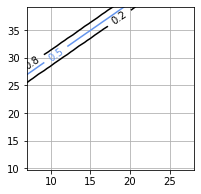

In [55]:
# リスト 6-2-(8)
# モデル等高線 2D 表示 ------------------------
def show_contour_logistic2(w):
    xn = 30  # パラメータの分割数
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%.1f', fontsize=10)
    plt.grid(True)

# test ---
plt.figure(figsize=(3,3))
W=[-1, 1, -20]
show_contour_logistic2(W)
plt.show()

In [56]:
# リスト 6-2-(9)
# 交差エントロピー誤差 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

In [57]:
# リスト 6-2-(10)
# 交差エントロピー誤差 の微分 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee

# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([-6.50636204, -8.04963093, -0.37258348])

ちゃんと動いてることを確認。

いよいよパラメータサーチ。

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


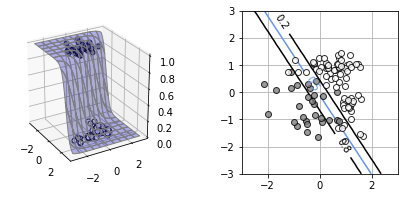

In [67]:
# リスト 6-2-(11)
from scipy.optimize import minimize

# ロジスティック回帰モデルのパラメータサーチ --
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x

# メイン ------------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

実際のデータセットを用いて分類することができた。

平均交差エントロピー誤差が最小となるような、

ロジスティック回帰モデルのパラメータが求まり、上手く決定境界が引けていることが確認できる。

途中で出力される Warning の原因は特定できなかった。

divide by zero encountered in log と出力されたので、
print 文をはさんでみて値をざっと見たが、0 の値は確認できなかった。

divide by zero encountered in log warning はよくあるらしい。

> python - RuntimeWarning: divide by zero encountered in log - Stack Overflow
>
> https://stackoverflow.com/questions/21610198/runtimewarning-divide-by-zero-encountered-in-log
> 
> \# numpy で出る warning なんかな?

# 6.3 ||| 2 次元入力 3 クラス分類

## 6.3.1 3 クラス分類ロジスティック回帰モデル (p.239~)

3 クラス分類では、 __ソフトマックス関数__(4.7.6 p.131 参照)を用いる。

> 活性化関数 - Wikipedia
> 
> https://ja.wikipedia.org/wiki/%E6%B4%BB%E6%80%A7%E5%8C%96%E9%96%A2%E6%95%B0
> 
> Activation function - Wikipedia
> 
> https://en.wikipedia.org/wiki/Activation_function
>
> \# 活性化関数にもいろいろある
> 
> \# シグモイド関数とかソフトマックス関数がよく使われるメジャーなもの? ReLU もよく聞く

ソフトマックス関数は、シグモイド関数を多変数に拡張したもの。

ソフトマックス関数の出力は以下のように表される。

$$y_k = \frac{exp(a_k)}{u}$$

$u$ と $a_k$ は以下のように与える。

$$u = exp(a_0) + exp(a_1) + exp(a_2) = \sum_{k=0}^{K-1} exp(a_k)$$

$$a_k = w_{k0} x_0 + w_{k1} x_1 + w_{k2} x_2 = \sum_{i=0}^{D} w_ki x_i  \quad (k = 0,1,2)$$

\# なぜ常に 1 のダミー入力が必要なの? y の総和を 1 にしたいから?

\# $D$ は定義されてる? 入力の個数? 次元? だとおもうけど


In [68]:
# リスト 6-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成 --------------------------------
np.random.seed(seed=1)  # 乱数を固定
N = 100  # データの数
K = 3  # 分布の数
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]  # X0 の範囲 , 表示用
X_range1 = [-3, 3]  # X1 の範囲 , 表示用
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 分布の分散
Pi = np.array([0.4, 0.8, 1])  # (A) 各分布への割合 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2] 

実際のデータセットを用いてやってたので、再度入力データを読み込んだ。

In [69]:
# リスト 6-2-(12)
#  3 クラス用ロジスティック回帰モデル -----------------

def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y

# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


$W$ は、ベクトルで入力して、logistic3 内で行列に変換される。

## 6.3.2 交差エントロピー誤差 (p.241~)

基本的に考え方は同じ。

下のような具体例を考えると理解しやすい。

$$P(t=[0,1,0]^T|x) = y_0^0 y_1^1 y_2^0 = y_1$$

すべてのデータについて確率を掛けて、平均交差エントロピー誤差 $E(W)$ を定義する。

$$E(W) = - \frac{1}{N} log P(T|X) = -\frac{1}{N} \sum_{n=0}^{N-1} \sum_{k=0}^{K-1} t_{nk} log y_{nk}$$

これをプログラムとして書くと、

In [70]:
# リスト 6-2-(13)
# 交差エントロピー誤差 ------------
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee

# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

3.9824582404787288

スカラー値が返ってくる。

## 6.3.3 勾配法による解 (p.243~)

勾配法で $E(W)$ を最小とする $W$ を求める。

$E(W)$ の各 $w_{ki}$ に関する偏微分をすると以下のようにシンプルな形になるらしい。詳細は 7 章で。

$$ \frac{\partial E}{\partial w_{ki}} = \frac{1}{N} \sum_{n=0}^{N-1} (y_{nk} - t_{nk}) x_{ni}$$

In [71]:
# リスト 6-2-(14)
# 交差エントロピー誤差の微分 ------------
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3))  # ( クラスの数 K) x (x の次元 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

各 $w_{ki}$ に関して偏微分した値が返ってくる。

例のごとく、minimize() を用いてパラメータを求める。

In [72]:
# リスト 6-2-(15)
# パラメータサーチ -----------------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

等高線表示をする関数も作っておく。

In [73]:
# リスト 6-2-(16)
# モデル等高線 2D 表示 --------------------
def show_contour_logistic3(w):
    xn = 30  # パラメータの分割数
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                             levels=(0.5, 0.9), 
                             colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%.1f', fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


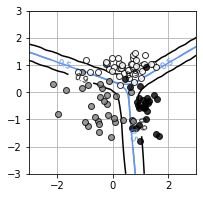

In [74]:
# リスト 6-2-(17)
# メイン ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

うまく境界線が引けていることがわかる。

多クラスロジスティック回帰モデルにおけるクラス間の境界線は、直線の組み合わせになっている。

ロジスティック回帰モデルのすごいところは、 __あいまいさを条件付き確率として近似__しているところ。